In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import simps

Definir los datos de enunciado

In [2]:
xa=0.0002
xb=0.05
yb=0.14
Recov=0.95
Q=14.158
P=101325
T=273.15
R=8.314

## a) Calcular el flujo masico de agua a la entrada

In [3]:
#Calcular el flujo de gas molar y composicion en a
rho_m=P/(R*T)
Vb=Q*rho_m
V_prima=Vb*(1-yb)
Va_ya=Vb*yb*0.05
ya=Va_ya/V_prima/(Va_ya/V_prima+1)
Va=V_prima/(1-ya)
#calcular X e Y
Yb=yb/(1-yb)
Ya=ya/(1-ya)
Xa=xa/(1-xa)
Xb=xb/(1-xb)

#Calculo de L'

L_prima=V_prima*(Yb-Ya)/(Xb-Xa)

La=L_prima/(1-xa)
Lb=L_prima/(1-xb)

print("El flujo de agua es de: ", np.round(L_prima*18.02*10**-3*60,0), " kg/h")

El flujo de agua es de:  1732.0  kg/h


In [4]:
Xa, Ya,Xb,Yb

(0.00020004000800160032,
 0.008139534883720932,
 0.052631578947368425,
 0.16279069767441862)

## b) Calcular $\mathrm{NTU_{OG}}$

In [5]:
#Definir loa y equilbirio
def y_star (x):
    #function que retorna y* con input de x
    return 0.33*np.exp(1.95*(1-x)**2)*x

def LOA(x):
    #funcion que retorna y para x
    X=x/(1-x)
    Y=Ya+L_prima/V_prima*(X-Xa)
    y=Y/(1+Y)
    return y


In [6]:
#Sacar los puntos
x_points=np.linspace(xa,xb,100)
y_star_points=y_star(x_points)
y_points=LOA(x_points)

In [7]:
#Integrar nuemricamente
f_y=1/(y_points-y_star_points)
NTU=simps(y=f_y,x=y_points)
print("El valor de NTU_OG es: ", np.round(NTU,5))

El valor de NTU_OG es:  6.88108


Grafico para LOA y equilibrio

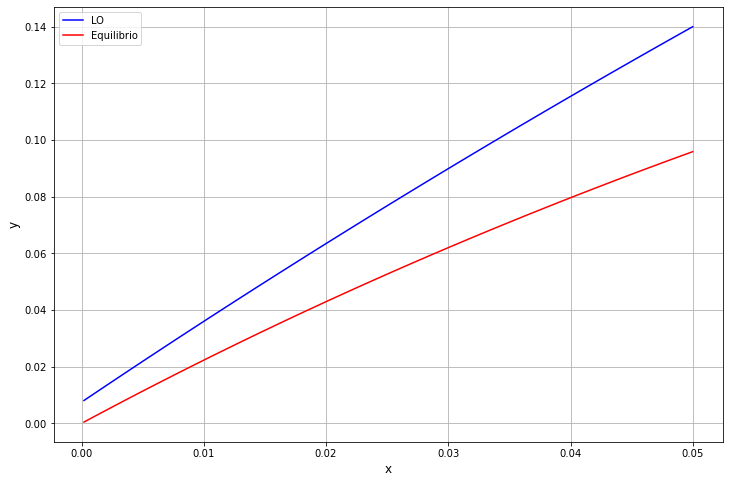

In [8]:
plt.figure(figsize=(12,8))
plt.plot(x_points,y_points,"b")
plt.plot(x_points,y_star_points,"r")
plt.grid()
plt.xlabel("x",fontsize=12)
plt.ylabel("y",fontsize=12)
plt.legend(("LO","Equilibrio"),loc="best")
plt.show()

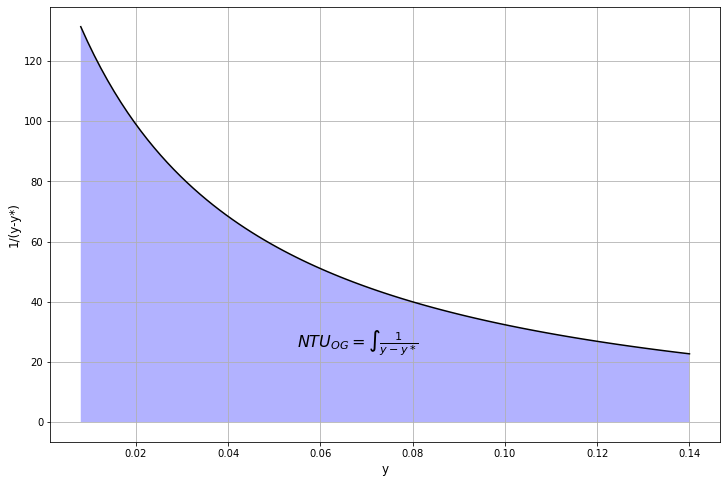

In [15]:
plt.figure(figsize=(12,8))
plt.plot(y_points,f_y,"k")
plt.grid()
plt.xlabel("y",fontsize=12)
plt.ylabel("1/(y-y*)",fontsize=12)
plt.fill_between(y_points,f_y,0,facecolor="blue", alpha=0.3)         
plt.annotate(r'$NTU_{OG}=\int\frac{1}{y-y*}$',xy=((yb-ya)/2.4, 25),fontsize=16)
plt.show()